###### 2020-10-20 화요일

# Python 시각화 (2)

#### 목차

#### 1. pie chart

#### 2. histogram

#### 3. scatter

#### 4.데이터프레임의 시각화

#### 5. Titanic / Iris 데이터를 이용한 시각화 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한글폰트 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)

# 마이너스 깨짐
mpl.rcParams['axes.unicode_minus'] = False

## 1. pie chart
   - category별 값의 상대적인 빈도의 비교를 해야할 경우
   - 차트의 원형을 유지하려면, `plt.axis('equal)` 옵션을 부여하자

autopct 사용법
 - '%0.2f' — 소숫점 두번째자리 까지 보여준다. 4.08
 - '%0.2f%%' — 소숫점 두번째자리까지 보여주고 맨 뒤에 ‘%’ 기호를 붙인다. 4.08%.
     - (% 기호를 두 번 쓰는 이유는 문자열 포매팅 할 때 처음 % 기호가 이스케이프 문자처럼 작동하기 때문이다.)
 - '%d%%' — 가장 가까운 정수로 반올림하고 맨 뒤에 % 기호를 붙인다.


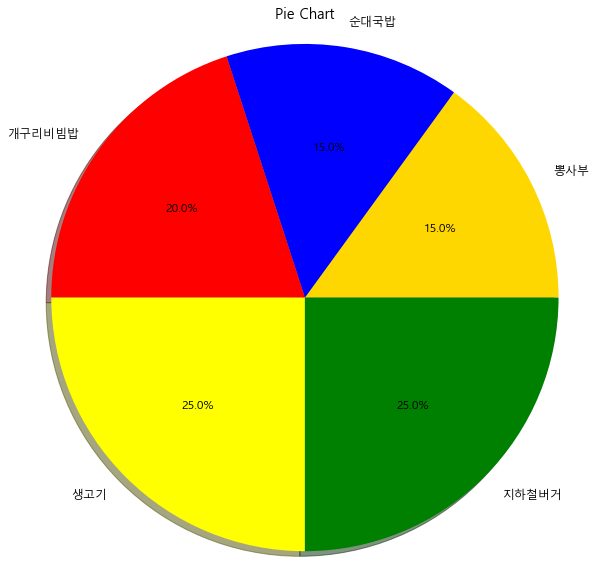

In [3]:
labels = ['뽕사부', '순대국밥', '개구리비빔밥', '생고기', '지하철버거']
sizes = [15, 15, 20, 25, 25]
colors = ['gold', 'blue', 'red', 'yellow', 'green']

plt.title('Pie Chart')
plt.pie(sizes, 
        labels=labels,     # 파이차트 라벨
        colors=colors,     # 파이차트 색상
        shadow=True,      # 파이차트 음영
        autopct='%1.1f%%') # 파이차트에 퍼센트표시
plt.axis('equal')     # 파이차트를 원형으로 유지해주는 옵션
plt.show()

## 2. histogram
   - 구간에 대한 데이터의 대략적인 분포(distribution)를 시각화 할 때 사용

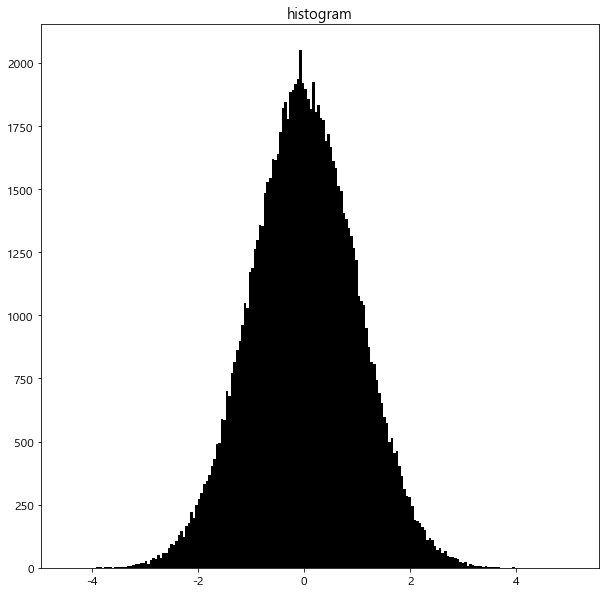

In [4]:
data = np.random.randn(100000)  # 표준정규푼보 난수


plt.title('histogram')
plt.hist(data, bins=200, color='black')
plt.show()


# 표준정규푼포로부터 10만개의 난수를 추출했을때, 표준정규분포와 유사한 histogram을 보인다.

## 3. scatter plot
   - 두 요인(두가지 칼럼)의 상관관계를 대략적으로 알아보기위해 그리는 그래프

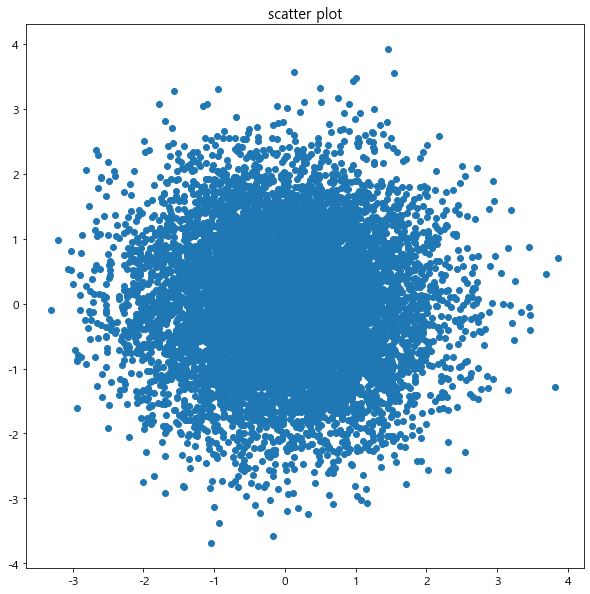

In [5]:
np.random.seed(100)

X = np.random.normal(0, 1, 10000)  ## np.random.randn 과 같은 함수
Y = np.random.normal(0, 1, 10000)


plt.title('scatter plot')
plt.scatter(X, Y)
plt.show()

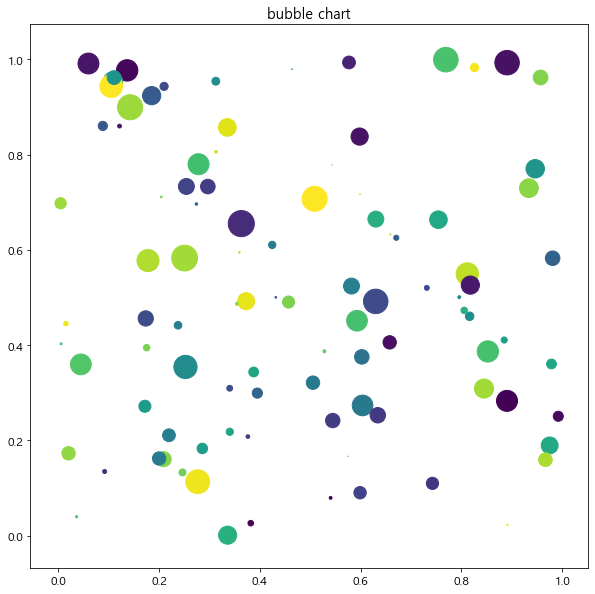

In [8]:
np.random.seed(100)

X  = np.random.rand(100)
Y = np.random.rand(100)
color = np.random.rand(100)
size = np.pi * (15 * np.random.rand(100))**2


plt.title('bubble chart')
plt.scatter(X, Y, c=color, s=size)
plt.show()

## 4.데이터프레임의 시각화
   - 한번 해봤지만 좀 더 자세하게 알아보자


In [12]:
np.random.seed(100)
sample_df = pd.DataFrame(np.random.randn(100, 3),
                        index = pd.date_range('1/1/2020', periods=100),
                        columns=['A', 'B', 'C'])
sample_df.head(10)

,A,B,C
2020-01-01,-1.749765,0.342680,1.153036
2020-01-02,-0.252436,0.981321,0.514219
2020-01-03,0.221180,-1.070043,-0.189496
2020-01-04,0.255001,-0.458027,0.435163
2020-01-05,-0.583595,0.816847,0.672721
2020-01-06,-0.104411,-0.531280,1.029733
2020-01-07,-0.438136,-1.118318,1.618982
2020-01-08,1.541605,-0.251879,-0.842436
2020-01-09,0.184519,0.937082,0.731000
2020-01-10,1.361556,-0.326238,0.055676


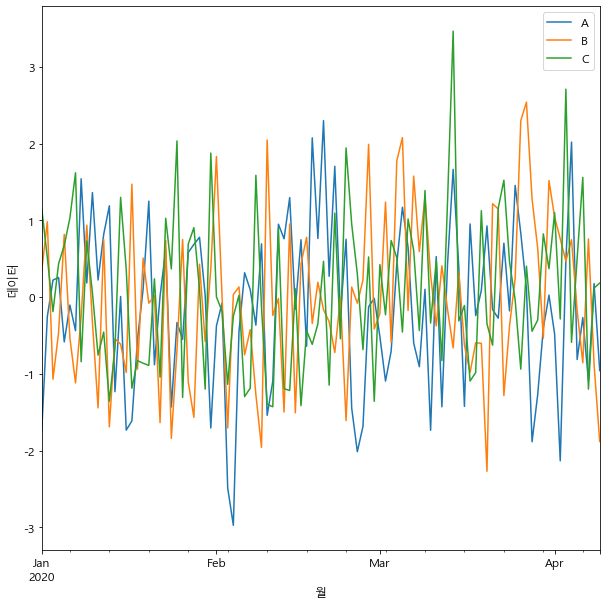

In [14]:
sample_df.plot()
plt.xlabel('월')
plt.ylabel('데이터')
plt.show()

In [17]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
iris    = sns.load_dataset('iris')

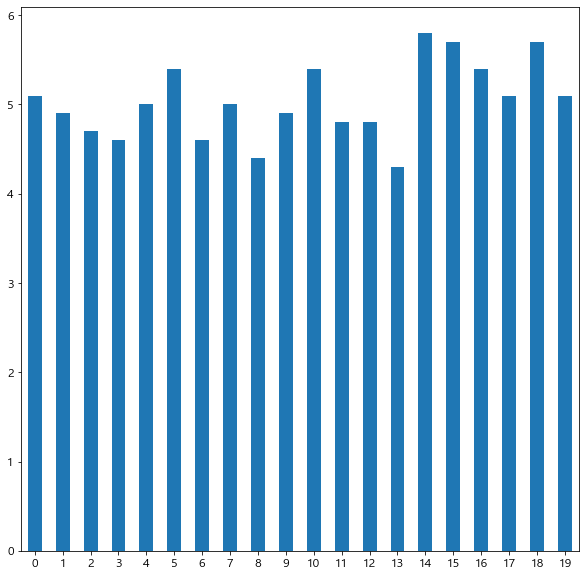

In [26]:
iris.sepal_length[:20].plot(kind='bar', rot=0)

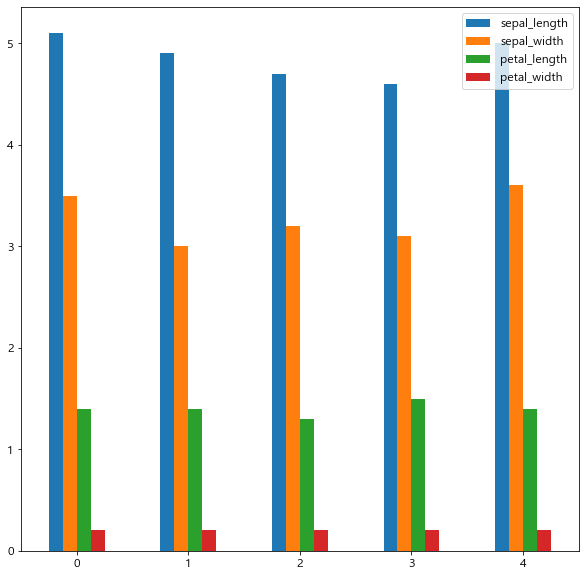

In [25]:
iris[:5].plot(kind='bar', rot=0)   # iris[:5].plot.bar(rot=0)과 같은 코드이다.
plt.show()

## 5. Titanic / Iris 데이터를 이용한 시각화 실습

##### 문제 01 ]

##### 그룹분석으로 각 붓꽃종의 평균을 구하고 시각화 한다면?

feature,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


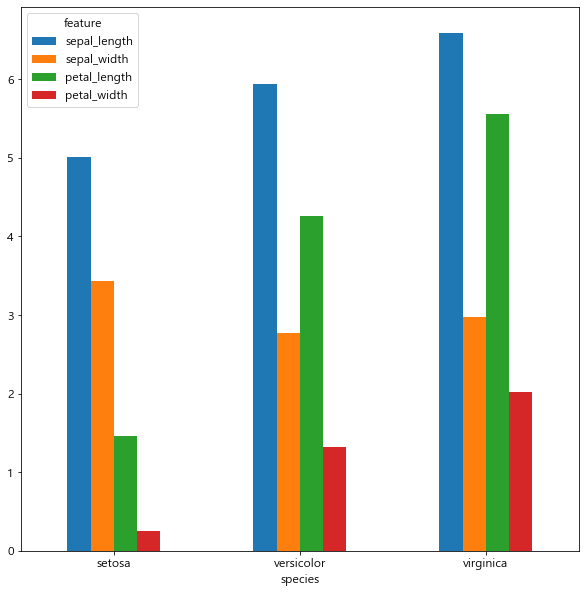

In [36]:
species_df = iris.groupby('species').agg(np.mean)
species_df.columns.name = 'feature'
display(species_df)

species_df.plot(kind='bar', rot=0)
plt.show()

#### 문제 02 ]
##### 위 문제는 x축이 species(setosa / versicolor / virginaca)로 되어있다.
##### x축이 sepal_length / sepal_width / petal_length / petal_width 로 나타나게 하려면? 

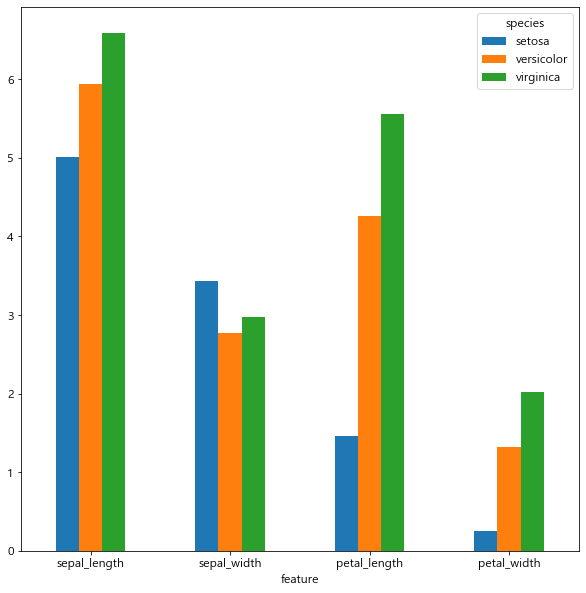

In [39]:
species_df.T.plot(kind='bar', rot=0)
plt.show()

#### 문제 03 ]

#####  타이타닉 데이터의 선실별 승객 수 비율을 파이차트로 구현해 본다면?

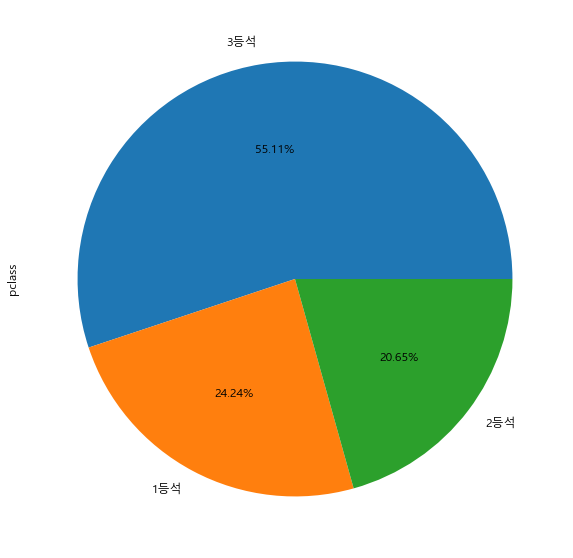

In [82]:
pclass_count = titanic['pclass'].value_counts()
pclass_ratio = pclass_count / pclass_count.sum()

labels = list(map(lambda x : str(x) + '등석', pclass_ratio.index))

pclass_ratio.plot.pie(autopct = '%.2f%%',
                     labels   = labels)

##### 문제 04 ]
##### Iris데이터에서 각 피쳐별 빈도수를 히스토그램으로 시각화 한다면?

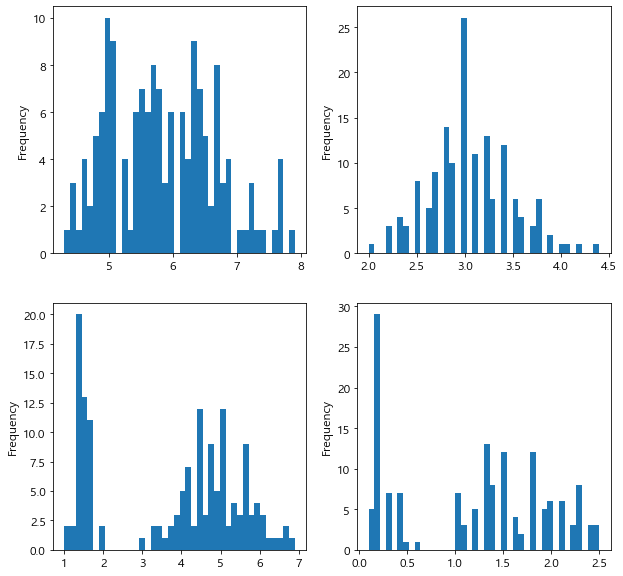

In [91]:
fig, axes = plt.subplots(2, 2)

iris['sepal_length'].plot(kind='hist', bins=40, ax=axes[0, 0])
iris['sepal_width'].plot(kind='hist', bins=40, ax=axes[0, 1])
iris['petal_length'].plot(kind='hist', bins=40, ax=axes[1, 0])
iris['petal_width'].plot(kind='hist', bins=40, ax=axes[1, 1])

##### KDE
   - 빈도에 대한 histogram을 대략적인 라인그래프로 그려준다.

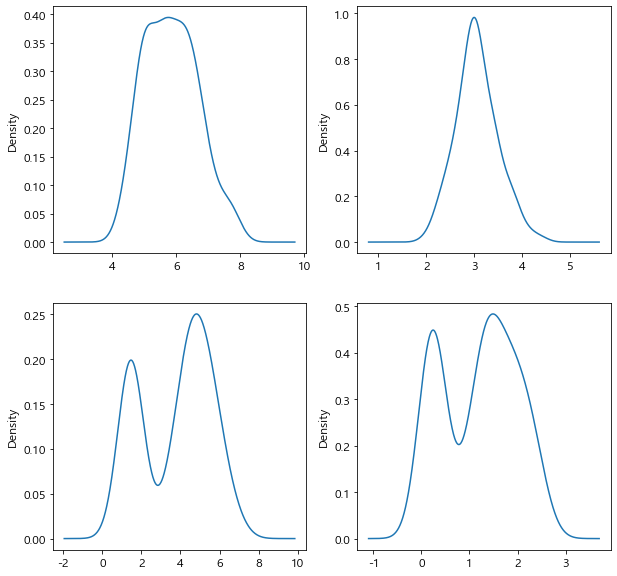

In [94]:
fig, axes = plt.subplots(2, 2)

iris['sepal_length'].plot.kde(ax=axes[0, 0])
iris['sepal_width'].plot.kde(ax=axes[0, 1])
iris['petal_length'].plot.kde(ax=axes[1, 0])
iris['petal_width'].plot.kde(ax=axes[1, 1])